AI4I 2020 Predictive Maintenance Dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pylab as plt
from sklearn import datasets, ensemble, model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

import os
import sklearn
import sklearn.datasets
import sklearn.ensemble
import xgboost

%matplotlib inline

In [2]:
df = pd.read_csv('ai4i2020_temp.csv', names = ["UDI", "Product ID", "Type",  
            "Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", 
                                        "Tool wear [min]", "TWF", "HDF", "PWF", "OSF", "RNF", "Machine failure"])

#df = pd.read_csv('ai4i2020.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Machine failure
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [3]:
# Change column to int
#print(type(df['Product ID'][0]))
df.replace('L', 0, inplace=True)
df.replace('M', 1, inplace=True)
df['Type'][df['Type'] == 'H'] = 2
print(type(df['Type'][9998]))

#df['Air temperature [K]'] = df['Air temperature [K]'].astype(float)
#df['Process temperature [K]'] = df['Process temperature [K]'].astype(float)
#df['Rotational speed [rpm]'] = df['Rotational speed [rpm]'].astype(float)
#df['Torque [Nm]'] = df['Torque [Nm]'].astype(float)

<class 'int'>


C:\Users\santo\AppData\Local\Temp/ipykernel_29880/1426831563.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type'][df['Type'] == 'H'] = 2


In [4]:
df
#correlation = df.corr()
#correlation

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Machine failure
0,1,M14860,1,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,0,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,0,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,0,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,0,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,1,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,2,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,1,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,2,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [5]:
feature_names = ["Type", "Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", 
                     "Tool wear [min]", "TWF", "HDF", "PWF", "OSF", "RNF"]

# Separating out the features
X = df[feature_names].values

# Separating out the target
y = df['Machine failure'].values

# Standardizing the features
X = StandardScaler().fit_transform(X)

In [6]:
X

array([[ 0.74441274, -0.95238944, -0.94735989, ..., -0.10786004,
        -0.09793424, -0.09948362],
       [-0.74530658, -0.90239341, -0.879959  , ..., -0.10786004,
        -0.09793424, -0.09948362],
       [-0.74530658, -0.95238944, -1.01476077, ..., -0.10786004,
        -0.09793424, -0.09948362],
       ...,
       [ 0.74441274, -0.50242514, -0.94735989, ..., -0.10786004,
        -0.09793424, -0.09948362],
       [ 2.23413206, -0.50242514, -0.879959  , ..., -0.10786004,
        -0.09793424, -0.09948362],
       [ 0.74441274, -0.50242514, -0.879959  , ..., -0.10786004,
        -0.09793424, -0.09948362]])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=2)

In [8]:
decision_tree = DecisionTreeClassifier().fit(X_train, y_train)
res = decision_tree.predict(X_test)
score = accuracy_score(res, y_test)
print('Decision Tree Accuracy:', score)

Decision Tree Accuracy: 0.9968571428571429


In [9]:
#importances = decision_tree.feature_importances_
#indices = np.argsort(importances)
#importances

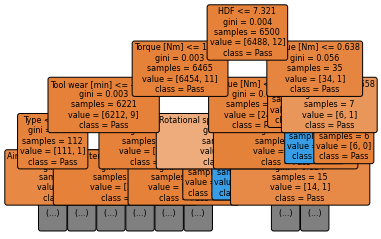

In [10]:
#visualization
vis = tree.plot_tree(decision_tree, feature_names = feature_names, class_names = ['Pass', 'Fail'], 
                     max_depth=4, fontsize=8, filled=True, rounded=True)

In [11]:
from omnixai.data.tabular import Tabular

In [12]:
length = len(feature_names)
tabular_data = Tabular(df, feature_names[1:])
print(tabular_data)

      Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0                   298.1                    308.6                    1551   
1                   298.2                    308.7                    1408   
2                   298.1                    308.5                    1498   
3                   298.2                    308.6                    1433   
4                   298.2                    308.7                    1408   
...                   ...                      ...                     ...   
9995                298.8                    308.4                    1604   
9996                298.9                    308.4                    1632   
9997                299.0                    308.6                    1645   
9998                299.0                    308.7                    1408   
9999                299.0                    308.7                    1500   

      Torque [Nm]  Tool wear [min]  TWF  HDF  PWF  OSF  RNF  
0

In [13]:
from omnixai.preprocessing.tabular import TabularTransform
# Data preprocessing
transformer = TabularTransform().fit(tabular_data)
class_names = transformer.class_names
x = transformer.transform(tabular_data)
# Split into training and test datasets
train, test, train_labels, test_labels = \
    sklearn.model_selection.train_test_split(x[:, :], x[:, -1], train_size=0.80)

# Train an XGBoost model (the last column of `x` is the label column after transformation)
model = xgboost.XGBClassifier(n_estimators=300, max_depth=5)
model.fit(train, train_labels)
# Convert the transformed data back to Tabular instances
train_data = transformer.invert(train)
test_data = transformer.invert(test)

In [14]:
#type(train)

In [15]:
from omnixai.explainers.tabular import TabularExplainer

# Initialize a TabularExplainer
explainers = TabularExplainer(
  explainers=["lime", "shap", "mace", "pdp", "ale"], # The explainers to apply
  mode="classification",                             # The task type
  data=train_data,                                   # The data for initializing the explainers
  model=model,                                       # The ML model to explain
  preprocess=lambda z: transformer.transform(z),     # Converts raw features into the model inputs
  params={
     "mace": {"ignored_features": []}
  }                                                  # Additional parameters
)

In [16]:
# Generate explanations
test_instances = test_data[:5]
local_explanations = explainers.explain(X=test_instances)
global_explanations = explainers.explain_global(
    params={"pdp": {"features": feature_names[1:]}}
)

  0%|          | 0/5 [00:00<?, ?it/s]

In [17]:
from omnixai.explainers.prediction import PredictionAnalyzer

analyzer = PredictionAnalyzer(
    mode="classification",
    test_data=test_data,                           # The test dataset (a `Tabular` instance)
    test_targets=test_labels,                      # The test labels (a numpy array)
    model=model,                                   # The ML model
    preprocess=lambda z: transformer.transform(z)  # Converts raw features into the model inputs
)

prediction_explanations = analyzer.explain()

In [ ]:
from omnixai.visualization.dashboard import Dashboard

# Launch a dashboard for visualization
dashboard = Dashboard(
   instances=test_instances,                        # The instances to explain
   local_explanations=local_explanations,           # Set the local explanations
   global_explanations=global_explanations,         # Set the global explanations
   prediction_explanations=prediction_explanations, # Set the prediction metrics
   class_names=class_names                          # Set class names
)

dashboard.show()                                    # Launch the dashboard

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app 'omnixai.visualization.dashboard' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [21/Oct/2022 00:07:43] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [21/Oct/2022 00:07:43] "GET /assets/base.css?m=1666297412.6552553 HTTP/1.1" 304 -
127.0.0.1 - - [21/Oct/2022 00:07:43] "GET /assets/styles.css?m=1666297412.6602576 HTTP/1.1" 304 -
127.0.0.1 - - [21/Oct/2022 00:07:43] "GET /assets/xai.css?m=1666297412.6622684 HTTP/1.1" 304 -
127.0.0.1 - - [21/Oct/2022 00:07:44] "GET /assets/resizing.js?m=1666297412.659258 HTTP/1.1" 304 -
127.0.0.1 - - [21/Oct/2022 00:07:44] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [21/Oct/2022 00:07:44] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [21/Oct/2022 00:07:44] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [21/Oct/2022 00:07:44] "GET /assets/logo_small.png HTTP/1.1" 304 -
127.0.0.1 - - [21/Oct/2022 00:07:44] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [21/Oct/2022 00:07:44] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTT